In [ ]:
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import cv2 as cv
#import matplotlib.pyplot as plt

In [ ]:
random.seed(1693)
np.random.seed(1693)
tf.random.set_seed(1693)

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


Step 1: Load & Prep Dataframes<br>
MNIST database here: https://www.tensorflow.org/datasets/catalog/mnist


In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print("test labels length: ", len(test_labels))

test labels length:  10000


#[Hyper-parameter Tuning Zone]<br>

In [ ]:
train_number_images = train_images.shape[0]
test_number_images = test_images.shape[0]
train_x_image_size = train_images.shape[1]
train_y_image_size = train_images.shape[2]
test_x_image_size = test_images.shape[1]
test_y_image_size = test_images.shape[2]
num_nodes_first = 5
num_classes = 10
num_epochs = 5
batch_size = 518 # the number of samples per batch
# 60,000 is our sample size
# 60,000 / 518 = about 116 batches per epoch

Step 2: Prep Train vs. Test Sets<br>
(1) Reshape train and test images to 60000 x 28 x 28 x 1<br>


In [ ]:
train_images = train_images.reshape((train_number_images, train_x_image_size , train_y_image_size, 1))

(2) Reduce range of data to 0,1<br>
One-hot code train and test labels using to_categorical

In [ ]:
# The pixal values range from 0 (min) to 255 (max)
# We can min-max scale the values manually here by dividing by 255

train_images = train_images/ 255

In [ ]:
print(train_images[30])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [ ]:

test_images = test_images.reshape((test_number_images, test_x_image_size , test_y_image_size, 1))
test_images = test_images / 255

In [ ]:
print(test_labels[0])

7


In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(test_labels[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


Take a look at a test image


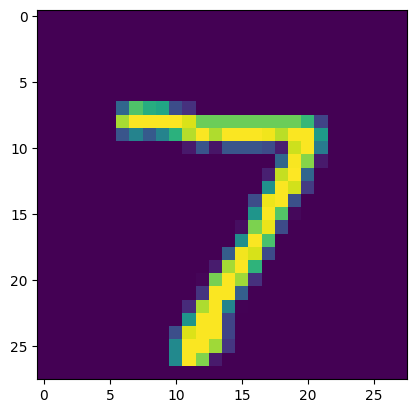

In [ ]:
image = test_images[0]
image = image.reshape((test_x_image_size,test_y_image_size))
plt.imshow(image)
plt.show()

Step 3: Train CNN Model


In [ ]:
network = models.Sequential()

network.add(layers.Conv2D(32, # number of filters
                          (3, 3), # filter size
                          activation='relu',
                          input_shape=(train_x_image_size , train_y_image_size, 1))) # 28x28x1 - use input_shape for multiple dimensions
# Do NOT specify input_shape or input_dim for layers below - only the first hidden layer needs input_dim/shape
network.add(layers.MaxPooling2D((2, 2))) # filter size 2x2
network.add(layers.Conv2D(64, (3, 3), activation='relu')) # Conv layers change dimensions
network.add(layers.MaxPooling2D((2, 2))) # Pooling layers change dimensions
network.add(layers.Flatten()) # Remember to specify input_shape if Flatten was used as the first hidden layer
network.add(layers.Dense(num_nodes_first, activation='relu'))
network.add(layers.Dense(num_classes, activation='softmax'))
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 5)                 8

Optional: You can create a visualization of your CNN using NN-SVG:
http://alexlenail.me/NN-SVG/index.html

In [ ]:
# Compile your model
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['acc'])

history = network.fit(train_images, train_labels, epochs = num_epochs, validation_data=(test_images, test_labels), batch_size = batch_size, verbose = 1)

Epoch 1/5
116/116 [==============================] - 35s 274ms/step - loss: 1.9054 - acc: 0.2496 - val_loss: 1.6004 - val_acc: 0.3766
Epoch 2/5
116/116 [==============================] - 25s 214ms/step - loss: 1.4492 - acc: 0.4729 - val_loss: 1.3287 - val_acc: 0.5118
Epoch 3/5
116/116 [==============================] - 25s 220ms/step - loss: 1.2772 - acc: 0.5205 - val_loss: 1.2249 - val_acc: 0.5450
Epoch 4/5
116/116 [==============================] - 25s 214ms/step - loss: 1.1793 - acc: 0.5772 - val_loss: 1.1187 - val_acc: 0.6274
Epoch 5/5
116/116 [==============================] - 25s 218ms/step - loss: 1.0538 - acc: 0.6447 - val_loss: 1.0141 - val_acc: 0.6606


Step 4: Evaluate model performance<br>
Use the Keras model evaluate() function to obtain tess loss and test accuracy<br>


In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_loss:', test_loss) #Q2-4-3
print('test_acc:', test_acc) #Q2-4-3

313/313 [==============================] - 2s 5ms/step - loss: 1.0141 - acc: 0.6606
test_loss: 1.0141143798828125
test_acc: 0.6606000065803528


In [ ]:
image=cv.imread("three.jpg")

In [ ]:
image.shape

(720, 904, 3)

In [ ]:
print(image)

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[ 88  88  88]
  [ 88  88  88]
  [ 88  88  88]
  ...
  [ 88  88  88]
  [ 88  88  88]
  [ 88  88  88]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [ ]:
image=cv.resize(image, (28,28))

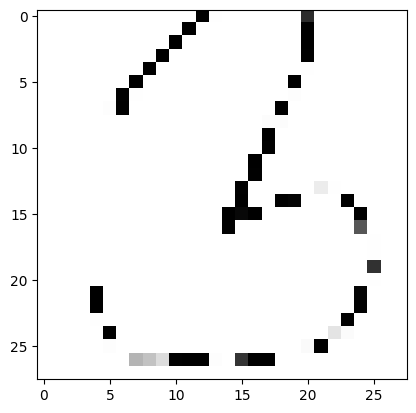

In [ ]:
plt.imshow(image)

In [ ]:
image=np.array(image)
print(image)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [ ]:
plt.imshow(image)

In [ ]:
grayscale=image.mean(axis=2)
print(grayscale.shape)

(28, 28)


In [ ]:
# For this model, you need to reshape the grayscale to 1x28x28x1
grayscale=grayscale.reshape(1,28,28,1)

In [ ]:
print(grayscale.shape)

(1, 28, 28, 1)


In [ ]:
yhat=network.predict(grayscale)
yhat

1/1 [==============================] - 0s 77ms/step


array([[0.0000000e+00, 0.0000000e+00, 6.2415114e-05, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        9.9993753e-01, 0.0000000e+00]], dtype=float32)

In [ ]:
prediction=np.argmax(yhat)
print(prediction)

8


In [ ]:
print("It's probably number " + str(prediction))
# Did the model predict your handwriting correctly?

It's probably number 8
